In [1]:
import numpy as np

In [ ]:
# Adjacency matrix representation

class AdjMatGraph:
  def __init__(self, vertices, directed):
    self.vertices = vertices
    self.mat = np.full((vertices, vertices), 0, dtype = int)
    self.directed = directed

  def addEdge(self, src, dest, weight = 1):
    self.mat[src][dest] = weight
    if not self.directed:
      self.mat[dest][src] = weight

  def degree(self, vertex):     # outDegree
    count = 0
    for i in range(self.vertices):
      if(self.mat[vertex][i] != 0):
        count += 1
    return count

In [ ]:
# Adjacency list representation

class Edge:
  def __init__(self, src, dest, weight):
    self.src = src
    self.dest = dest
    self.weight = weight
    self.next = None

class AdjLstGraph:
  def __init__(self, vertices, directed):
    self.vertices = vertices
    self.lst = np.full(vertices, None, dtype = object)
    self.directed = directed

  def addEdgeHelper(self, src, dest, weight):
    newE = Edge(src, dest, weight)
    if self.lst[src] == None:
      self.lst[src] = newE
    else:
      temp = self.lst[src]
      while(temp != None):
        if temp.dest == dest:
          return
        temp = temp.next
      newE.next = self.lst[src]
      self.lst[src] = newE

  def addEdge(self, src, dest, weight = 1):
    self.addEdgeHelper(src, dest, weight)
    if not self.directed:
      self.addEdgeHelper(dest, src, weight)

  def degree(self, vertex):     # outDegree
    count = 0
    temp = self.lst[vertex]
    while(temp != None):
      count += 1
      temp = temp.next
    return count

  def printAdjList(self):
    for i in range(self.vertices):
      temp = self.lst[i]
      print(f"{i}:", end=" ")
      while temp != None:
          print(f"-> {temp.dest} (W: {temp.weight})", end=" ")
          temp = temp.next
      print()

# **Task 1.1**

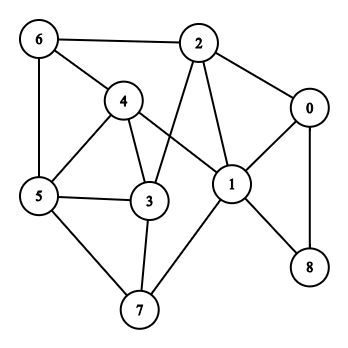

In [ ]:
def maxDegree(theGraph):
  maxVal = -99
  for i in range(theGraph.vertices):
    deg = theGraph.degree(i)
    if deg > maxVal:
      maxVal = deg
      maxVertex = i
  return maxVertex, maxVal

# Driver Code 1.1
theGraphInMat = AdjMatGraph(9, False)

theGraphInMat.addEdge(0, 2)
theGraphInMat.addEdge(0, 1)
theGraphInMat.addEdge(0, 8)
theGraphInMat.addEdge(1, 2)
theGraphInMat.addEdge(1, 4)
theGraphInMat.addEdge(1, 7)
theGraphInMat.addEdge(1, 8)
theGraphInMat.addEdge(2, 6)
theGraphInMat.addEdge(2, 3)
theGraphInMat.addEdge(3, 5)
theGraphInMat.addEdge(3, 4)
theGraphInMat.addEdge(3, 7)
theGraphInMat.addEdge(4, 6)
theGraphInMat.addEdge(4, 5)
theGraphInMat.addEdge(5, 6)
theGraphInMat.addEdge(5, 7)

print(theGraphInMat.mat)

maxVertex, maxDeg = maxDegree(theGraphInMat)
print(f"The vertex {maxVertex} has maximum degree and it is {maxDeg}")

[[0 1 1 0 0 0 0 0 1]
 [1 0 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 0 0]
 [0 0 1 0 1 1 0 1 0]
 [0 1 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 1 0 1 1 0 0 0]
 [0 1 0 1 0 1 0 0 0]
 [1 1 0 0 0 0 0 0 0]]
The vertex 1 has maximum degree and it is 5


# **Task 1.2**

In [ ]:
# Driver Code 1.2
theGraphInLst = AdjLstGraph(9, False)

theGraphInLst.addEdge(0, 2)
theGraphInLst.addEdge(0, 1)
theGraphInLst.addEdge(0, 8)
theGraphInLst.addEdge(1, 2)
theGraphInLst.addEdge(1, 4)
theGraphInLst.addEdge(1, 7)
theGraphInLst.addEdge(1, 8)
theGraphInLst.addEdge(2, 6)
theGraphInLst.addEdge(2, 3)
theGraphInLst.addEdge(3, 5)
theGraphInLst.addEdge(3, 4)
theGraphInLst.addEdge(3, 7)
theGraphInLst.addEdge(4, 6)
theGraphInLst.addEdge(4, 5)
theGraphInLst.addEdge(5, 6)
theGraphInLst.addEdge(5, 7)

theGraphInLst.printAdjList()
maxVertex, maxDeg = maxDegree(theGraphInLst)
print(f"The vertex {maxVertex} has maximum degree and it is {maxDeg}")

0: -> 8 (W: 1) -> 1 (W: 1) -> 2 (W: 1) 
1: -> 8 (W: 1) -> 7 (W: 1) -> 4 (W: 1) -> 2 (W: 1) -> 0 (W: 1) 
2: -> 3 (W: 1) -> 6 (W: 1) -> 1 (W: 1) -> 0 (W: 1) 
3: -> 7 (W: 1) -> 4 (W: 1) -> 5 (W: 1) -> 2 (W: 1) 
4: -> 5 (W: 1) -> 6 (W: 1) -> 3 (W: 1) -> 1 (W: 1) 
5: -> 7 (W: 1) -> 6 (W: 1) -> 4 (W: 1) -> 3 (W: 1) 
6: -> 5 (W: 1) -> 4 (W: 1) -> 2 (W: 1) 
7: -> 5 (W: 1) -> 3 (W: 1) -> 1 (W: 1) 
8: -> 1 (W: 1) -> 0 (W: 1) 
The vertex 1 has maximum degree and it is 5


# **Task 2.1**

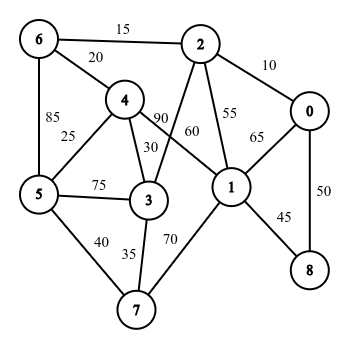

In [ ]:
def maxWeight(theGraph, AdjMat = True):
  sumA = np.full(theGraph.vertices, 0, dtype=int)

  if AdjMat:
    for i in range(theGraph.vertices):
      sum = 0
      for j in range(theGraph.vertices):
        sum += theGraph.mat[i][j]
      sumA[i] = sum
  else:
    for i in range(theGraph.vertices):
      sum = 0
      temp = theGraph.lst[i]
      while temp != None:
        sum += temp.weight
        temp = temp.next
      sumA[i] = sum

  maxVal = -99
  for k in range(len(sumA)):
    if sumA[k] > maxVal:
      maxVal = sumA[k]
      maxVertex = k

  return maxVertex

# Driver Code 2.1
theGraphInMat = AdjMatGraph(9, False)

theGraphInMat.addEdge(0, 2, 10)
theGraphInMat.addEdge(0, 1, 65)
theGraphInMat.addEdge(0, 8, 50)
theGraphInMat.addEdge(1, 2, 55)
theGraphInMat.addEdge(1, 4, 60)
theGraphInMat.addEdge(1, 7, 70)
theGraphInMat.addEdge(1, 8, 45)
theGraphInMat.addEdge(2, 6, 15)
theGraphInMat.addEdge(2, 3, 90)
theGraphInMat.addEdge(3, 5, 75)
theGraphInMat.addEdge(3, 4, 30)
theGraphInMat.addEdge(3, 7, 35)
theGraphInMat.addEdge(4, 6, 20)
theGraphInMat.addEdge(4, 5, 25)
theGraphInMat.addEdge(5, 6, 85)
theGraphInMat.addEdge(5, 7, 40)

print(theGraphInMat.mat)
print(f"Sum of edge weights of the vertex {maxWeight(theGraphInMat)} is maximum")

[[ 0 65 10  0  0  0  0  0 50]
 [65  0 55  0 60  0  0 70 45]
 [10 55  0 90  0  0 15  0  0]
 [ 0  0 90  0 30 75  0 35  0]
 [ 0 60  0 30  0 25 20  0  0]
 [ 0  0  0 75 25  0 85 40  0]
 [ 0  0 15  0 20 85  0  0  0]
 [ 0 70  0 35  0 40  0  0  0]
 [50 45  0  0  0  0  0  0  0]]
Sum of edge weights of the vertex 1 is maximum


# **Task 2.2**

In [ ]:
# Driver Code 2.2
theGraphInLst = AdjLstGraph(9, False)

theGraphInLst.addEdge(0, 2, 10)
theGraphInLst.addEdge(0, 1, 65)
theGraphInLst.addEdge(0, 8, 50)
theGraphInLst.addEdge(1, 2, 55)
theGraphInLst.addEdge(1, 4, 60)
theGraphInLst.addEdge(1, 7, 70)
theGraphInLst.addEdge(1, 8, 45)
theGraphInLst.addEdge(2, 6, 15)
theGraphInLst.addEdge(2, 3, 90)
theGraphInLst.addEdge(3, 5, 75)
theGraphInLst.addEdge(3, 4, 30)
theGraphInLst.addEdge(3, 7, 35)
theGraphInLst.addEdge(4, 6, 20)
theGraphInLst.addEdge(4, 5, 25)
theGraphInLst.addEdge(5, 6, 85)
theGraphInLst.addEdge(5, 7, 40)

theGraphInLst.printAdjList()
print(f"\nSum of edge weights of the vertex {maxWeight(theGraphInLst, False)} is maximum")

0: -> 8 (W: 50) -> 1 (W: 65) -> 2 (W: 10) 
1: -> 8 (W: 45) -> 7 (W: 70) -> 4 (W: 60) -> 2 (W: 55) -> 0 (W: 65) 
2: -> 3 (W: 90) -> 6 (W: 15) -> 1 (W: 55) -> 0 (W: 10) 
3: -> 7 (W: 35) -> 4 (W: 30) -> 5 (W: 75) -> 2 (W: 90) 
4: -> 5 (W: 25) -> 6 (W: 20) -> 3 (W: 30) -> 1 (W: 60) 
5: -> 7 (W: 40) -> 6 (W: 85) -> 4 (W: 25) -> 3 (W: 75) 
6: -> 5 (W: 85) -> 4 (W: 20) -> 2 (W: 15) 
7: -> 5 (W: 40) -> 3 (W: 35) -> 1 (W: 70) 
8: -> 1 (W: 45) -> 0 (W: 50) 

Sum of edge weights of the vertex 1 is maximum


# **Task 3.1**

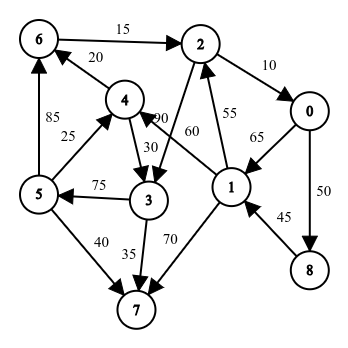

In [ ]:
# Driver Code 3.1
theGraphInMat = AdjMatGraph(9, True)

theGraphInMat.addEdge(4, 6, 20)
theGraphInMat.addEdge(5, 4, 25)
theGraphInMat.addEdge(5, 6, 85)
theGraphInMat.addEdge(0, 1, 65)
theGraphInMat.addEdge(2, 3, 90)
theGraphInMat.addEdge(3, 5, 75)
theGraphInMat.addEdge(1, 4, 60)
theGraphInMat.addEdge(1, 2, 55)
theGraphInMat.addEdge(2, 0, 10)
theGraphInMat.addEdge(6, 2, 15)
theGraphInMat.addEdge(1, 7, 70)
theGraphInMat.addEdge(5, 7, 40)
theGraphInMat.addEdge(3, 7, 35)
theGraphInMat.addEdge(4, 3, 30)
theGraphInMat.addEdge(8, 1, 45)
theGraphInMat.addEdge(0, 8, 50)

print(theGraphInMat.mat)

maxVertex, maxDeg = maxDegree(theGraphInMat)
print(f"The vertex {maxVertex} has maximum outdegree and it is {maxDeg}")
print(f"Sum of outgoing edge weights of the vertex {maxWeight(theGraphInMat)} is maximum")

[[ 0 65  0  0  0  0  0  0 50]
 [ 0  0 55  0 60  0  0 70  0]
 [10  0  0 90  0  0  0  0  0]
 [ 0  0  0  0  0 75  0 35  0]
 [ 0  0  0 30  0  0 20  0  0]
 [ 0  0  0  0 25  0 85 40  0]
 [ 0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0]]
The vertex 1 has maximum outdegree and it is 3
Sum of outgoing edge weights of the vertex 1 is maximum


# **Task 3.2**

In [ ]:
# Driver Code 3.2
theGraphInLst = AdjLstGraph(9, True)

theGraphInLst.addEdge(4, 6, 20)
theGraphInLst.addEdge(5, 4, 25)
theGraphInLst.addEdge(5, 6, 85)
theGraphInLst.addEdge(0, 1, 65)
theGraphInLst.addEdge(2, 3, 90)
theGraphInLst.addEdge(3, 5, 75)
theGraphInLst.addEdge(1, 4, 60)
theGraphInLst.addEdge(1, 2, 55)
theGraphInLst.addEdge(2, 0, 10)
theGraphInLst.addEdge(6, 2, 15)
theGraphInLst.addEdge(1, 7, 70)
theGraphInLst.addEdge(5, 7, 40)
theGraphInLst.addEdge(3, 7, 35)
theGraphInLst.addEdge(4, 3, 30)
theGraphInLst.addEdge(8, 1, 45)
theGraphInLst.addEdge(0, 8, 50)

theGraphInLst.printAdjList()
maxVertex, maxDeg = maxDegree(theGraphInLst)
print(f"The maximum outdegree is {maxDeg}")
print(f"Sum of outgoing edge weights of the vertex {maxWeight(theGraphInLst, False)} is maximum")

0: -> 8 (W: 50) -> 1 (W: 65) 
1: -> 7 (W: 70) -> 2 (W: 55) -> 4 (W: 60) 
2: -> 0 (W: 10) -> 3 (W: 90) 
3: -> 7 (W: 35) -> 5 (W: 75) 
4: -> 3 (W: 30) -> 6 (W: 20) 
5: -> 7 (W: 40) -> 6 (W: 85) -> 4 (W: 25) 
6: -> 2 (W: 15) 
7: 
8: -> 1 (W: 45) 
The maximum outdegree is 3
Sum of outgoing edge weights of the vertex 1 is maximum


# **Task 4.1**

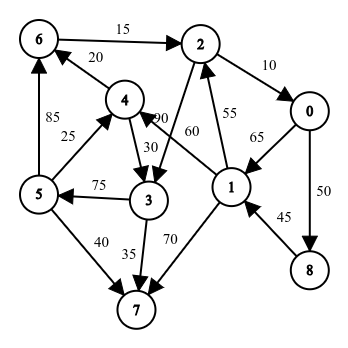

In [ ]:
def convert(theGraph, AdjMat = True):
  if AdjMat:
    for r in range(theGraph.vertices):
      for c in range(theGraph.vertices):
        if theGraph.mat[r][c] != 0:
          theGraph.mat[c][r] = theGraph.mat[r][c]

  else:
    for i in range(theGraph.vertices):
      temp = theGraph.lst[i]
      while(temp != None):
        theGraph.addEdge(temp.dest, temp.src, temp.weight)
        temp = temp.next

# Driver Code 4.1
theGraphInMat = AdjMatGraph(9, True)

theGraphInMat.addEdge(4, 6, 20)
theGraphInMat.addEdge(5, 4, 25)
theGraphInMat.addEdge(5, 6, 85)
theGraphInMat.addEdge(0, 1, 65)
theGraphInMat.addEdge(2, 3, 90)
theGraphInMat.addEdge(3, 5, 75)
theGraphInMat.addEdge(1, 4, 60)
theGraphInMat.addEdge(1, 2, 55)
theGraphInMat.addEdge(2, 0, 10)
theGraphInMat.addEdge(6, 2, 15)
theGraphInMat.addEdge(1, 7, 70)
theGraphInMat.addEdge(5, 7, 40)
theGraphInMat.addEdge(3, 7, 35)
theGraphInMat.addEdge(4, 3, 30)
theGraphInMat.addEdge(8, 1, 45)
theGraphInMat.addEdge(0, 8, 50)

print("Directed weighted graph:")
print(theGraphInMat.mat)
convert(theGraphInMat)
print("\nConverted undirected weighted graph:")
print(theGraphInMat.mat)

Directed weighted graph:
[[ 0 65  0  0  0  0  0  0 50]
 [ 0  0 55  0 60  0  0 70  0]
 [10  0  0 90  0  0  0  0  0]
 [ 0  0  0  0  0 75  0 35  0]
 [ 0  0  0 30  0  0 20  0  0]
 [ 0  0  0  0 25  0 85 40  0]
 [ 0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0]]

Converted undirected weighted graph:
[[ 0 65 10  0  0  0  0  0 50]
 [65  0 55  0 60  0  0 70 45]
 [10 55  0 90  0  0 15  0  0]
 [ 0  0 90  0 30 75  0 35  0]
 [ 0 60  0 30  0 25 20  0  0]
 [ 0  0  0 75 25  0 85 40  0]
 [ 0  0 15  0 20 85  0  0  0]
 [ 0 70  0 35  0 40  0  0  0]
 [50 45  0  0  0  0  0  0  0]]


In [ ]:
# Driver Code 4.2
theGraphInLst = AdjLstGraph(9, True)

theGraphInLst.addEdge(4, 6, 20)
theGraphInLst.addEdge(5, 4, 25)
theGraphInLst.addEdge(5, 6, 85)
theGraphInLst.addEdge(0, 1, 65)
theGraphInLst.addEdge(2, 3, 90)
theGraphInLst.addEdge(3, 5, 75)
theGraphInLst.addEdge(1, 4, 60)
theGraphInLst.addEdge(1, 2, 55)
theGraphInLst.addEdge(2, 0, 10)
theGraphInLst.addEdge(6, 2, 15)
theGraphInLst.addEdge(1, 7, 70)
theGraphInLst.addEdge(5, 7, 40)
theGraphInLst.addEdge(3, 7, 35)
theGraphInLst.addEdge(4, 3, 30)
theGraphInLst.addEdge(8, 1, 45)
theGraphInLst.addEdge(0, 8, 50)

print("Directed weighted graph:")
theGraphInLst.printAdjList()
convert(theGraphInLst, False)
print("\nConverted undirected weighted graph:")
theGraphInLst.printAdjList()

Directed weighted graph:
0: -> 8 (W: 50) -> 1 (W: 65) 
1: -> 7 (W: 70) -> 2 (W: 55) -> 4 (W: 60) 
2: -> 0 (W: 10) -> 3 (W: 90) 
3: -> 7 (W: 35) -> 5 (W: 75) 
4: -> 3 (W: 30) -> 6 (W: 20) 
5: -> 7 (W: 40) -> 6 (W: 85) -> 4 (W: 25) 
6: -> 2 (W: 15) 
7: 
8: -> 1 (W: 45) 

Converted undirected weighted graph:
0: -> 2 (W: 10) -> 8 (W: 50) -> 1 (W: 65) 
1: -> 8 (W: 45) -> 0 (W: 65) -> 7 (W: 70) -> 2 (W: 55) -> 4 (W: 60) 
2: -> 6 (W: 15) -> 1 (W: 55) -> 0 (W: 10) -> 3 (W: 90) 
3: -> 4 (W: 30) -> 2 (W: 90) -> 7 (W: 35) -> 5 (W: 75) 
4: -> 5 (W: 25) -> 1 (W: 60) -> 3 (W: 30) -> 6 (W: 20) 
5: -> 3 (W: 75) -> 7 (W: 40) -> 6 (W: 85) -> 4 (W: 25) 
6: -> 5 (W: 85) -> 4 (W: 20) -> 2 (W: 15) 
7: -> 5 (W: 40) -> 3 (W: 35) -> 1 (W: 70) 
8: -> 0 (W: 50) -> 1 (W: 45) 
